# author : Ashok kumar
### grip task 8 : providing a detailed Timeline Analysis of the Covid affected regions across the world, and visualizing them.
### data science and business analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [2]:
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67349 entries, 0 to 67348
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               64359 non-null  object 
 1   continent                              63976 non-null  object 
 2   location                               67349 non-null  object 
 3   date                                   67349 non-null  object 
 4   total_cases                            66754 non-null  float64
 5   new_cases                              66752 non-null  float64
 6   new_cases_smoothed                     65751 non-null  float64
 7   total_deaths                           57906 non-null  float64
 8   new_deaths                             58064 non-null  float64
 9   new_deaths_smoothed                    65751 non-null  float64
 10  total_cases_per_million                63769 non-null  float64
 11  ne

In [4]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.675400e+04,66752.000000,65751.000000,5.790600e+04,58064.000000,65751.000000,63769.000000,63762.000000,62808.000000,55088.000000,...,61617.00000,42173.000000,62262.000000,62977.000000,49092.000000,48419.000000,31217.000000,57143.000000,64028.000000,61896.000000
mean,5.339547e+05,5040.053586,5051.582579,1.669355e+04,128.224098,111.466137,6161.883286,61.983230,61.950351,149.035874,...,19120.32019,13.210530,256.738325,7.776058,10.569788,32.648462,51.077273,3.040229,73.119708,0.715265
std,3.787038e+06,32237.645328,31966.325496,9.611476e+04,707.499669,639.880927,12465.232962,167.179945,139.522955,274.159398,...,19643.24265,19.895833,118.198371,3.909635,10.415587,13.458541,31.771626,2.469869,7.545317,0.153706
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.24000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,6.160000e+02,1.000000,5.286000,3.300000e+01,0.000000,0.000000,116.010000,0.084000,0.882000,5.030000,...,4541.79500,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,6.567500e+03,53.000000,64.286000,2.100000e+02,1.000000,0.857000,903.133000,5.208000,7.170000,26.152500,...,12951.83900,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.747000
75%,7.222700e+04,621.000000,643.857000,1.994000e+03,15.000000,11.286000,5530.295000,48.361750,54.258500,144.465250,...,27216.44500,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,1.061625e+08,858062.000000,738534.000000,2.317201e+06,17882.000000,14402.429000,132673.267000,8652.658000,2648.773000,2033.119000,...,116935.60000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [5]:
covid_data.continent.value_counts()[0:10]

Africa           17761
Europe           16249
Asia             16215
North America     7790
South America     4124
Oceania           1837
Name: continent, dtype: int64

In [6]:
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
626,NaN,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
1324,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1667,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1992,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2324,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2728,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
3072,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
3455,NaN,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
india=covid_data[covid_data["location"]=="India"]

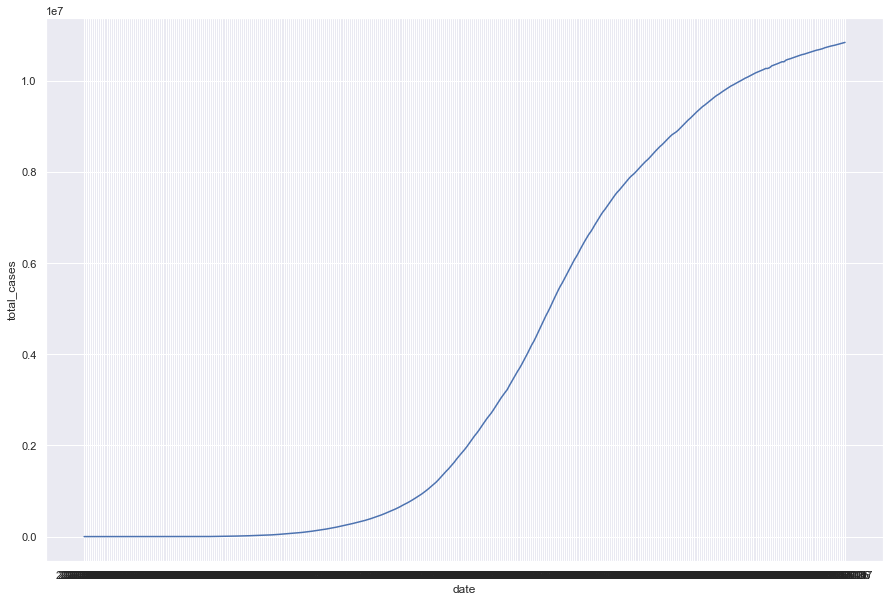

In [11]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [12]:

india_last_5_days=india.tail()

### last 5 days

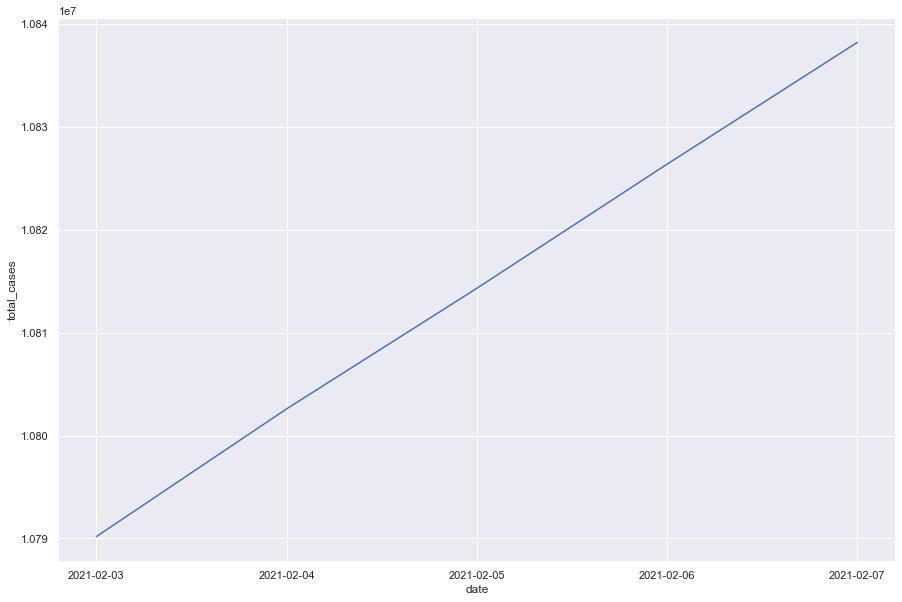

In [13]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

### total test per day

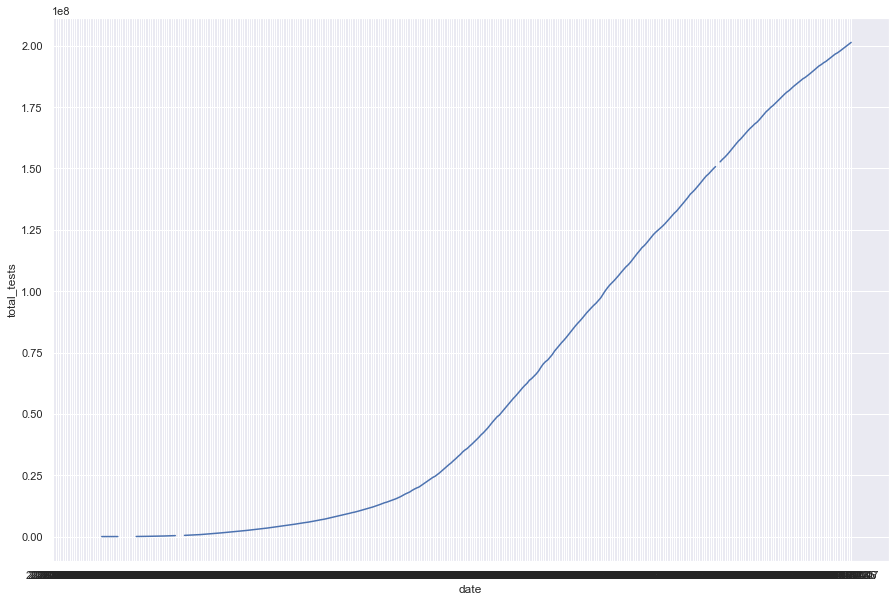

In [15]:


sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

In [16]:
india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

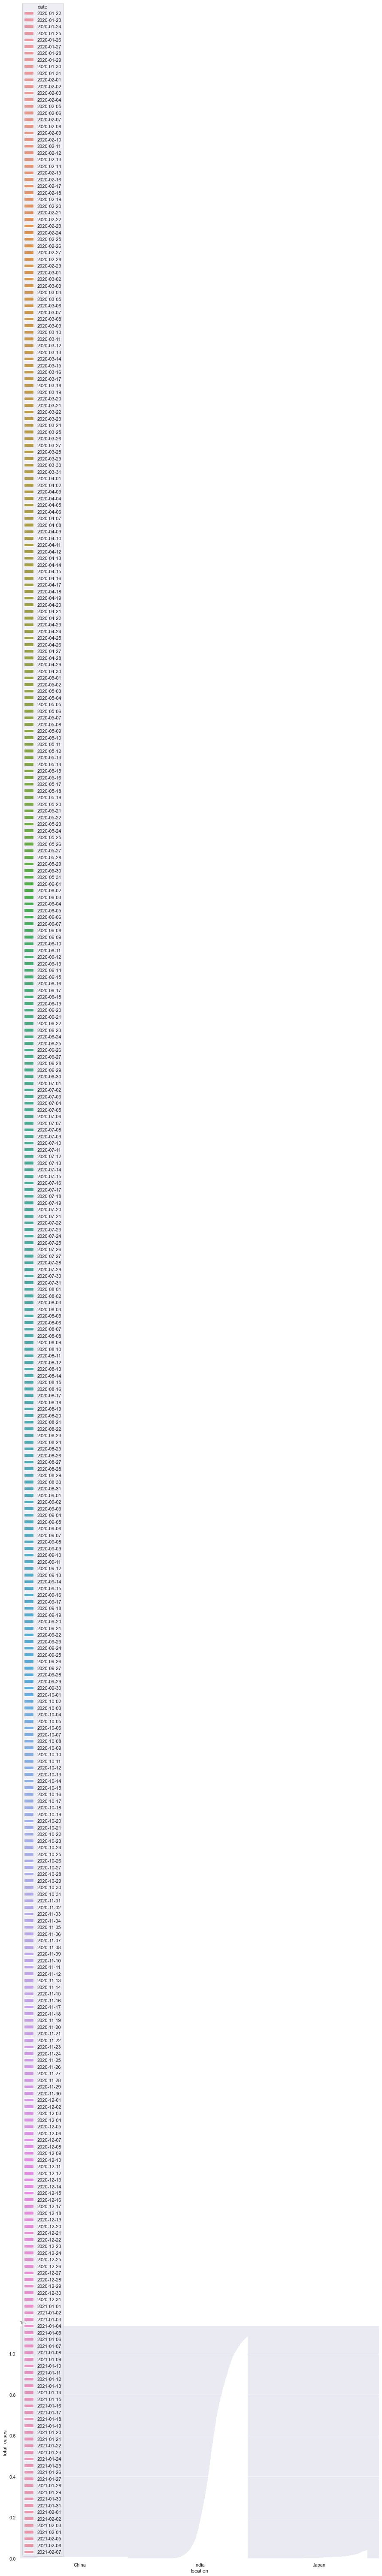

In [17]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [20]:

# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
659,NaN,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
1357,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1700,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65958,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
66341,OWID_WRL,NaN,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
66645,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
66972,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [21]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66341,OWID_WRL,NaN,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
20879,NaN,NaN,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44518,NaN,NaN,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3488,NaN,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64154,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65245,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
55049,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.546
38298,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.708
51500,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.713


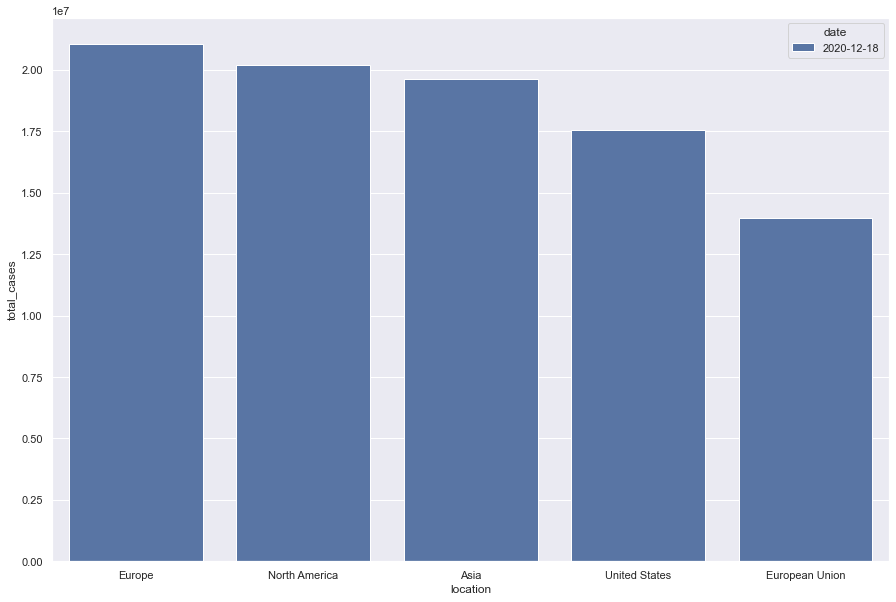

In [22]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()